# Uber Supply Demand Gap Case Study

##### The objective of this case study is to identify the main cause of the problem i.e. The cancellation of rides and the unavailability of cars.


## - Load the libraries, load the data onto the notebook and standardize it according to the need.

In [46]:
# importing the useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# loading the data
uber = pd.read_excel('Uber Request Data.xlsx')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT


In [48]:
# identifying the datatypes
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [49]:
uber.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,4016,2282
top,NaN,City,NaN,Trip Completed,2016-07-15 19:19:00,2016-07-13 08:53:00
freq,NaN,3507,NaN,2831,8,5
first,NaN,NaN,NaN,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00
last,NaN,NaN,NaN,NaN,2016-07-15 23:59:00,2016-07-16 01:09:00
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN


In [50]:
uber.shape

(6745, 6)

### Data Cleaning - Checking duplicate rows

In [51]:
uber.drop_duplicates()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT


In [52]:
# No rows get dropped i.e. no duplicate data
uber.shape

(6745, 6)

In [53]:
# changing the Request timestamp and Drop timestamp datatype from object to datetime
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT


In [54]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [55]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

### The data has only two columns (Driver id and Drop timestamp) with null values which are not required to be cleaned because we need to perform analytics on for these problematic values only.

 ### -------------------------------------------------------------------------------------------------------------------------------------------------------------





## -  Deriving or Extracting the useful data from the given dataframe

In [56]:
# Extracting Hour from Request timestamp
def timestamp(t):
    return t.hour
uber['Pickup Hour'] = uber['Request timestamp'].apply(timestamp)

In [57]:
# Extracting Hour from Drop timestamp
def timestamp1(t1):
    return t1.hour
uber['Drop Hour'] = uber['Drop timestamp'].apply(timestamp1)

In [58]:
# Calculating the journey time 
uber['Journey Time'] = uber['Drop timestamp']-uber['Request timestamp']

In [59]:
uber['Request Date'] = uber['Request timestamp'].dt.date
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Pickup Hour,Drop Hour,Journey Time,Request Date
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,01:09:00,2016-07-11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,00:50:00,2016-07-11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,00:41:00,2016-07-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,00:55:00,2016-07-12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,9.0,00:52:00,2016-07-13
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,NaN,NaT,2016-07-15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,NaN,NaT,2016-07-15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,NaN,NaT,2016-07-15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,NaN,NaT,2016-07-15


In [60]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Request id         6745 non-null   int64          
 1   Pickup point       6745 non-null   object         
 2   Driver id          4095 non-null   float64        
 3   Status             6745 non-null   object         
 4   Request timestamp  6745 non-null   datetime64[ns] 
 5   Drop timestamp     2831 non-null   datetime64[ns] 
 6   Pickup Hour        6745 non-null   int64          
 7   Drop Hour          2831 non-null   float64        
 8   Journey Time       2831 non-null   timedelta64[ns]
 9   Request Date       6745 non-null   object         
dtypes: datetime64[ns](2), float64(2), int64(2), object(3), timedelta64[ns](1)
memory usage: 527.1+ KB


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Setting timeslots for the day and dividing them into 8 parts

### Time Distribution
- 1 : `Midnight (00:00 - 02:59)`
- 2 : `Early Morning (03:00 - 05:59)`
- 3 : `Morning (06:00 - 08:59)`
- 4 : `Early Afternoon (09:00 - 11:59)`
- 5 : `Afternoon (12:00 - 14:59)`
- 6 : `Early evening (15:00 - 17:59)`
- 7 : `Late evening (18:00 - 20:59)`
- 8 : `Night (21:00 - 23:59)`

In [61]:
uber.loc[(uber['Pickup Hour'] >= 0) & (uber['Pickup Hour'] < 3),'Pickup Timeslots'] = 1
uber.loc[(uber['Pickup Hour'] >= 3) & (uber['Pickup Hour'] < 6),'Pickup Timeslots'] = 2
uber.loc[(uber['Pickup Hour'] >= 6) & (uber['Pickup Hour'] < 9),'Pickup Timeslots'] = 3
uber.loc[(uber['Pickup Hour'] >= 9) & (uber['Pickup Hour'] < 12),'Pickup Timeslots'] = 4
uber.loc[(uber['Pickup Hour'] >= 12) & (uber['Pickup Hour'] < 15),'Pickup Timeslots'] = 5
uber.loc[(uber['Pickup Hour'] >= 15) & (uber['Pickup Hour'] < 18),'Pickup Timeslots'] = 6
uber.loc[(uber['Pickup Hour'] >= 18) & (uber['Pickup Hour'] < 21),'Pickup Timeslots'] = 7
uber.loc[(uber['Pickup Hour'] >= 21) & (uber['Pickup Hour'] <= 23),'Pickup Timeslots'] = 8

In [62]:
# converting the datatype of Pickup Timeslots from object to int
uber['Pickup Timeslots'] = uber['Pickup Timeslots'].astype(int)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Pickup Hour,Drop Hour,Journey Time,Request Date,Pickup Timeslots
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,13.0,01:09:00,2016-07-11,4
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,18.0,00:50:00,2016-07-11,6
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,9.0,00:41:00,2016-07-12,4
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,22.0,00:55:00,2016-07-12,8
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,8,9.0,00:52:00,2016-07-13,3
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,NaN,NaT,2016-07-15,8
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,NaN,NaT,2016-07-15,8
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,NaN,NaT,2016-07-15,8
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,NaN,NaT,2016-07-15,8


In [63]:
# Copying problematic data to another dataframe
problem = uber[uber['Status'] != 'Trip Completed']
problem

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Pickup Hour,Drop Hour,Journey Time,Request Date,Pickup Timeslots
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:00,NaT,6,NaN,NaT,2016-07-13,3
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:00,NaT,17,NaN,NaT,2016-07-14,6
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:00,NaT,20,NaN,NaT,2016-07-14,7
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:00,NaT,10,NaN,NaT,2016-07-15,4
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,19,NaN,NaT,2016-07-12,7
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,23,NaN,NaT,2016-07-15,8
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,23,NaN,NaT,2016-07-15,8
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,23,NaN,NaT,2016-07-15,8
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,23,NaN,NaT,2016-07-15,8


In [64]:
# creating two datasets for different pickup points
uber_air = uber[uber['Pickup point']=='Airport']
uber_city = uber[uber['Pickup point']=='City']

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## - Analysis of data to identify some trends that are causing problem

In [65]:
# Count of people whose pickup point is either airport or city
count = uber.groupby('Pickup point')['Pickup point'].count()
count

Pickup point
Airport    3238
City       3507
Name: Pickup point, dtype: int64

## Univariate Analysis
### This plot shows the frequency of people wanting to start their journey from Airport or City 

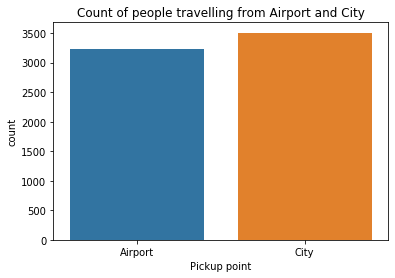

In [66]:
sns.countplot(x='Pickup point',data=uber).set_title('Count of people travelling from Airport and City')
plt.savefig('a.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Segmented Univariate Analysis
### This plot will show the status of the requests made on both pickup points 

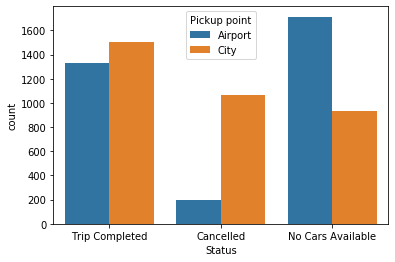

In [67]:
#Status of Airport and city
sns.countplot(x='Status',hue='Pickup point',data=uber)
plt.savefig('b.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [68]:
# Count of rides with their status at both the pickup points
c1 = uber.groupby(['Pickup point','Status'])['Pickup point'].count()
c1

Pickup point  Status           
Airport       Cancelled             198
              No Cars Available    1713
              Trip Completed       1327
City          Cancelled            1066
              No Cars Available     937
              Trip Completed       1504
Name: Pickup point, dtype: int64

In [69]:
c2 = problem.groupby('Pickup point')['Status'].count()
c2

Pickup point
Airport    1911
City       2003
Name: Status, dtype: int64

## Segmented Univariate Analysis
### This plot shows the frequency of the problematic ride status at both the pickup points

In this we can see that most of the requests with 'No cars available' status are at the Airport with very less 'Cancelled' requests but at the city, both the problematic requests are approximately equal in numbers.
Although, both the Pickup points have high problematic requests, but the city (1911) have a slightly higher than that of Airport (2003). Also cancellation is a bigger problem than the unavailability of cabs.

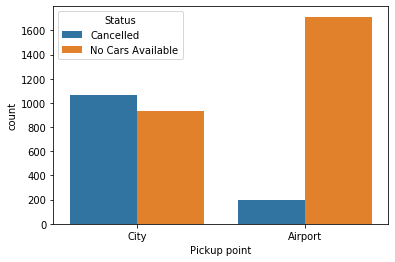

In [70]:
sns.countplot(x='Pickup point',hue='Status',data=problem)
plt.savefig('c.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [71]:
# Count of the status of the requests at different timeslots of the day
c3=uber.groupby(['Pickup Timeslots','Status'])['Pickup Timeslots'].count()
c3

Pickup Timeslots  Status           
1                 Cancelled             12
                  No Cars Available    169
                  Trip Completed       102
2                 Cancelled            229
                  No Cars Available    214
                  Trip Completed       297
3                 Cancelled            492
                  No Cars Available    239
                  Trip Completed       496
4                 Cancelled            252
                  No Cars Available    189
                  Trip Completed       404
5                 Cancelled             48
                  No Cars Available    134
                  Trip Completed       298
6                 Cancelled             78
                  No Cars Available    326
                  Trip Completed       344
7                 Cancelled             89
                  No Cars Available    895
                  Trip Completed       491
8                 Cancelled             64
                  

In [72]:
# Count of problematic requests at different timeslots
c4 = problem.groupby('Pickup Timeslots')['Status'].count()
c4

Pickup Timeslots
1    181
2    443
3    731
4    441
5    182
6    404
7    984
8    548
Name: Status, dtype: int64

## Derived metrices
### The plots shows us the frequency at different timeslots of the day

- The first piechart shows us the total ampunt of requests coming in the 8 different timeslots of the day. We can see that the slot number 3 and 7 `(i.e. Morning and Late evening)` get the highest number of requests comparatively to the other slots.
- Second plot shows the number of requests made in different timeslots od the day with their status. As we can see that the morning slots of 2, 3 and 4 `(from 3:00 to 12:00)` have a higher cancellation rate, but the evening slots of 6, 7 and 8 `(from 15:00 to 00:00)` have a hogher number of unavailable cabs.

### Time Distribution
- 1 : `Midnight (00:00 - 02:59)`
- 2 : `Early Morning (03:00 - 05:59)`
- 3 : `Morning (06:00 - 08:59)`
- 4 : `Early Afternoon (09:00 - 11:59)`
- 5 : `Afternoon (12:00 - 14:59)`
- 6 : `Early evening (15:00 - 17:59)`
- 7 : `Late evening (18:00 - 20:59)`
- 8 : `Night (21:00 - 23:59)`

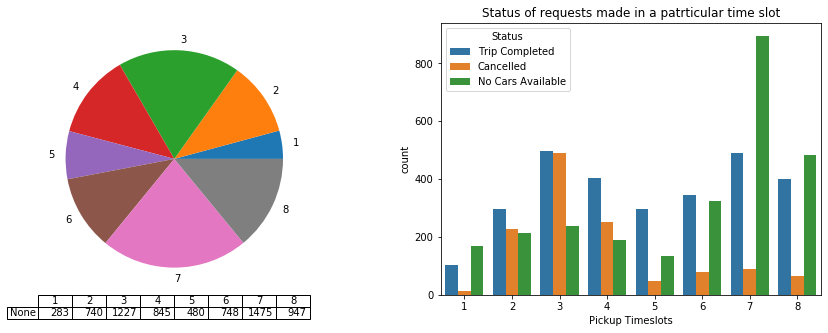

<Figure size 432x288 with 0 Axes>

In [73]:
#subplots
plt.figure(figsize=(15,5))
#subplot 1
# plot to show the amount of requests at 8 different timeslots of the day.
plt.subplot(1,2,1)
uber.groupby('Pickup Timeslots').size().plot(kind='pie',stacked=True,table=True,subplots=True)
plt.ylabel("")
#subplot 2
plt.subplot(1,2,2)
sns.countplot(x='Pickup Timeslots', hue='Status',data=uber).set_title('Status of requests made in a patrticular time slot')

plt.show()
plt.savefig('d.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

In [74]:
date_status = uber.groupby(['Request Date','Status'])['Status'].count()
date_status

Request Date  Status           
2016-07-11    Cancelled            262
              No Cars Available    504
              Trip Completed       601
2016-07-12    Cancelled            240
              No Cars Available    505
              Trip Completed       562
2016-07-13    Cancelled            270
              No Cars Available    490
              Trip Completed       577
2016-07-14    Cancelled            252
              No Cars Available    571
              Trip Completed       530
2016-07-15    Cancelled            240
              No Cars Available    580
              Trip Completed       561
Name: Status, dtype: int64

### This plot shows the count of all the requests with their status

The pie chart shows the number of the total requests came on all the 5 consecutive dates of the July month. Every date got approximately same amount of requests `(i.e. nearly 1300)`

The second plot shows the data for five consecutive days of July month. We can see that every status for all the five days are in approximately same amount so this analysis doesn't have much significance.

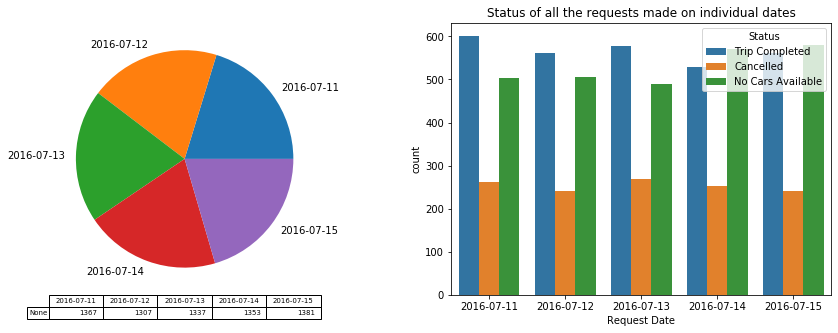

<Figure size 432x288 with 0 Axes>

In [75]:
#subplots
plt.figure(figsize=(15,5))
#subplot 1
plt.subplot(1,2,1)
uber.groupby('Request Date').size().plot(kind='pie',stacked=True,table=True,subplots=True)
plt.ylabel("")
#subplot 2
plt.subplot(1,2,2)
sns.countplot(x='Request Date',hue='Status',data=uber).set_title('Status of all the requests made on individual dates')
plt.show()
plt.savefig('e.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### This plot shows the count of requests at different pickup points at every hour.

This is an important analysis as we can derive that most of the requests come from City in the morning and most of the requests at night come from the Airport location.

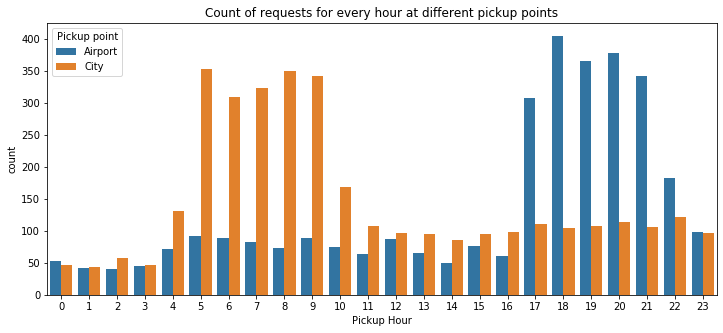

In [76]:
plt.figure(figsize=(12,5))
sns.countplot(x='Pickup Hour',hue='Pickup point',data=uber).set_title('Count of requests for every hour at different pickup points')
plt.savefig('f.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Count of requests at different pickup locations for every hour of the day

As we know that most of the morning requests come from the `City` location and most of the night requests come from the `Airport` location. So it was clear that the morning problems would appear at the `City` and the night problems would appear at the `Airport` as shown in the below analysis.

<Figure size 720x360 with 0 Axes>

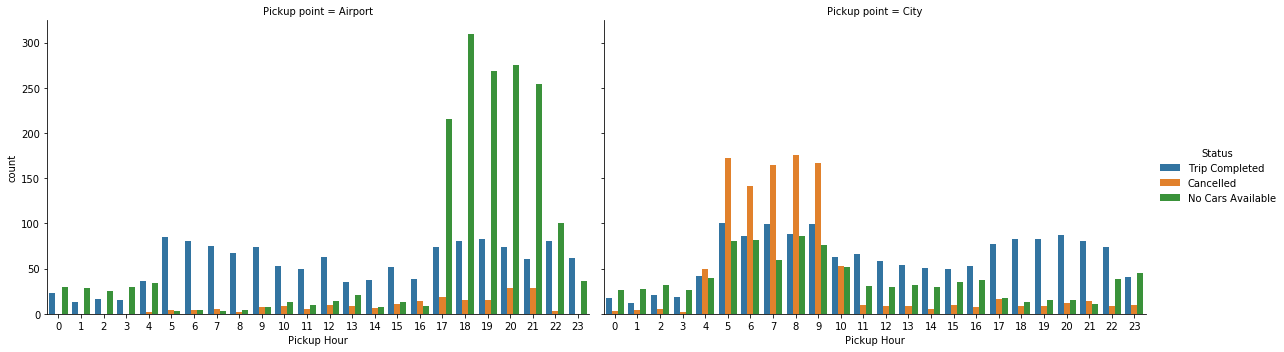

In [77]:
plt.figure(figsize=(10,5))
sns.catplot(x='Pickup Hour',hue='Status',col='Pickup point',kind='count',data=uber,aspect=1.6)
plt.savefig('j.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

# - Supply-Demand Gap

Supply Demand Gap in this analysis means the difference between the numbers of requests made by travellers `(i.e. Supply)` and the count of drivers or cars available `(i.e. Demand)` at the pickup point and at a particular time.

### Plot for the supply demand gap at the Airport

This plot shows the difference between the numbers of requests made by travellers and the number of drivers available at the `Airport` on a particular time of the day.

We can see that from `17:00 to 22:00`, the Supply-Demand gap is pretty high.

In [78]:
uber_air_1 = uber_air.groupby('Pickup Hour',as_index=False).agg({'Driver id':'count','Request id':'count'})
uber_air_1['SD Gap'] = uber_air_1['Request id'] - uber_air_1['Driver id']
uber_air_1

,Pickup Hour,Driver id,Request id,SD Gap
0,0,23,53,30
1,1,13,42,29
2,2,16,41,25
3,3,15,45,30
4,4,38,72,34
5,5,89,92,3
6,6,85,89,4
7,7,80,83,3
8,8,69,73,4
9,9,82,89,7


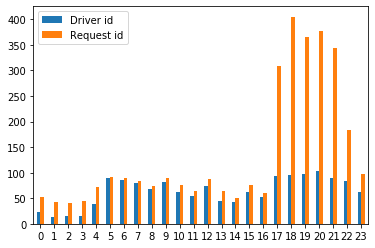

In [79]:
# Plotting barplot
uber_air_2 = uber_air_1[['Driver id','Request id']]
uber_air_2.plot.bar(rot=0)
plt.savefig('g.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### Plot for the supply demand gap at the City

This plot shows the difference between the numbers of requests made by travellers and the number of drivers available at the `City` on a particular time of the day.

We can see that from `05:00 to 09:00`, the Supply-Demand gap is pretty high.

In [80]:
uber_city_1 = uber_city.groupby('Pickup Hour',as_index=False).agg({'Driver id':'count','Request id':'count'})
uber_city_1['SD Gap'] = uber_city_1['Request id'] - uber_city_1['Driver id']
uber_city_1

,Pickup Hour,Driver id,Request id,SD Gap
0,0,20,46,26
1,1,16,43,27
2,2,26,58,32
3,3,21,47,26
4,4,91,131,40
5,5,272,353,81
6,6,227,309,82
7,7,263,323,60
8,8,264,350,86
9,9,266,342,76


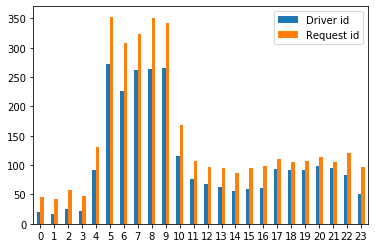

In [81]:
# Plotting barplot
uber_city_2 = uber_city_1[['Driver id','Request id']]
uber_city_2.plot.bar(rot=0)
plt.savefig('h.png')

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### This plot shows the demand and supply gap at Airport and City

- Here `0` means `Airport` and `1` means `City`.

We can see that the demand supply gap at `Airport` is much higher than that at the `City`.

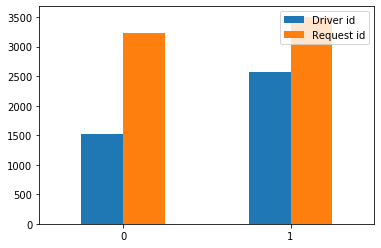

In [82]:
uber_1 = uber.groupby('Pickup point',as_index=False).agg({'Driver id':'count','Request id':'count'})
uber_2 = uber_1[['Driver id','Request id']]
uber_2.plot.bar(rot=0)
plt.savefig('i.png')